In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, NullFormatter

from numpy import linalg as LA

import math
import scipy
from scipy.special import cbrt




In [3]:
b2=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b2newD.csv"
b2=pd.read_csv(b2,  header=None)
#b1=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b1full.csv"
b1=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b1newD.csv"
b1=pd.read_csv(b1,  header=None)
#b3=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b3full.csv"
b3=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b3newD.csv"
b3=pd.read_csv(b3,  header=None)

#b4=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b4full.csv"
b4=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b4newDc.csv"
b4=pd.read_csv(b4, header=None)
#b5=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b5full.csv"
b5=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b5newD.csv"
b5=pd.read_csv(b5,  header=None)
#b6=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b6full.csv"
b6=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver\b6newD.csv"
b6=pd.read_csv(b6,  header=None)



rad=pd.read_csv(r"C:\Users\User\My Nortek\radiation1.csv")
ra=rad.iloc[2920:10920]
ra.index=np.arange(4000,12000,1)#len(ra))
ra.columns=['0','1','2']
r=ra['2']



In [22]:
VV2=pd.DataFrame( data = b1 , index = None , columns = None , dtype = None ,
copy = False )
VV1=pd.DataFrame( data = b2 , index = None , columns = None , dtype = None ,
copy = False )
VV3=pd.DataFrame( data = b3 , index = None , columns = None , dtype = None ,
copy = False )

VV4=pd.DataFrame( data = b4 , index = None , columns = None , dtype = None ,
copy = False )
VV5=pd.DataFrame( data = b5 , index = None , columns = None , dtype = None ,
copy = False )
VV6=pd.DataFrame( data = b6 , index = None , columns = None , dtype = None ,
copy = False )


VVV1=VV1.drop(VV1.columns[[0,1,2]],axis='columns')
VVV2=VV2.drop(VV2.columns[[0,1,2]],axis='columns')
VVV3=VV3.drop(VV3.columns[[0,1,2]],axis='columns')
VVV4=VV4.drop(VV4.columns[[0,1,2]],axis='columns')
VVV5=VV5.drop(VV5.columns[[0,1,2]],axis='columns')
VVV6=VV6.drop(VV6.columns[[0,1,2]],axis='columns')



ti=450 #Это полночь на 28 марта #9090 # Это полночь, с 02 на 03 апреля; старт приборов был в 16:30 27 марта 2020.
tf=450+1440 #13500 # Соответствует 01:30, 7 апреля.

V1=VVV1.iloc[ti:tf]
V2=VVV2.iloc[ti:tf]
V3=VVV3.iloc[ti:tf]
V4=VVV4.iloc[ti:tf]
V5=VVV5.iloc[ti:tf]
V6=VVV6.iloc[ti:tf]

#V1

In [23]:
a0=25
sin0=np.sin(6.28*a0/360)
cos0=(1-sin0**2)**(1/2)
sina=sin0*3**(1/2)/2 # Это синус половинного угла между лучами
cosa=(1-sina*2)**(1/2)
cos2a=1-2*sina**2 # Это косинус угла между лучами
sin2a=2*sina*cosa
cos3a=cos2a*cosa-sin2a*sina

ta=np.tan(6.28*a0/360)
cta=1/ta



def closest(lst, K): 
      
     lst = np.asarray(lst) 
     idx = (np.abs(lst - K)).argmin() 
     return lst[idx] 
      
lst = V1.columns#[3.64, 5.2, 9.42, 9.35, 8.5, 8] 




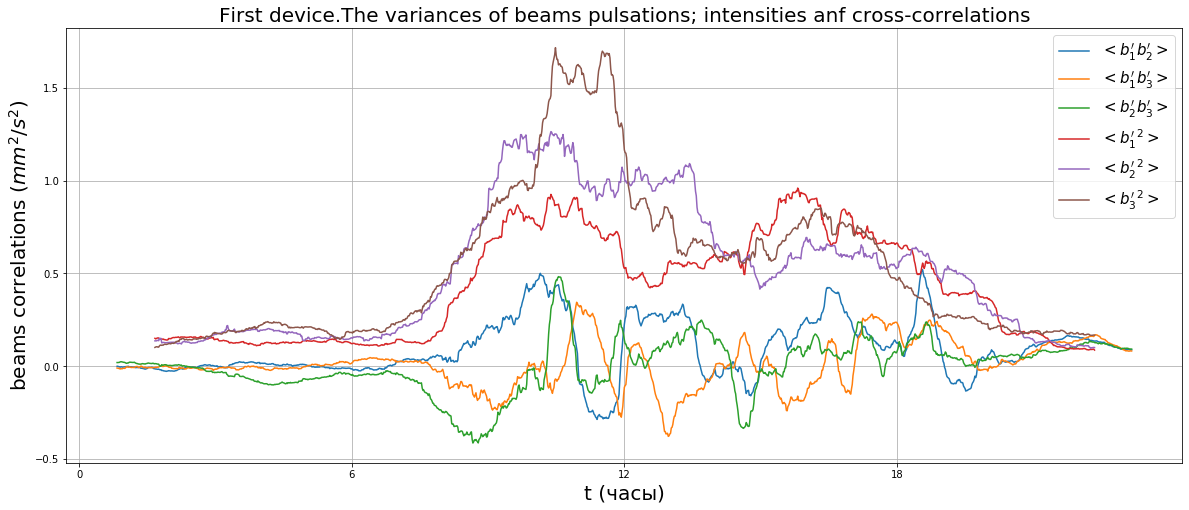

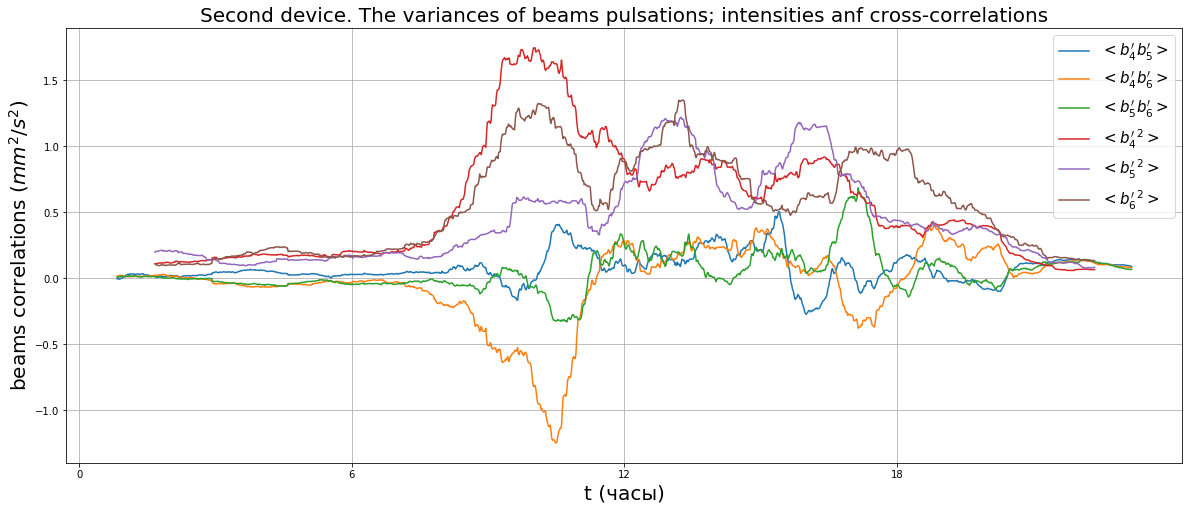

In [27]:

L0=65
AB=2*L0*sina

A1=closest(lst, (L0-AB/2)) #Это расстояние от A до верхней референсной точки при вычислении SF
A2=closest(lst, (L0+AB/2)) #Это расстояние от A до нижней референсной точки при вычислении SF

t=100

V1m=V1.rolling(t,center=True).mean()
V2m=V2.rolling(t,center=True).mean()
V3m=V3.rolling(t,center=True).mean()
V4m=V4.rolling(t,center=True).mean()
V5m=V5.rolling(t,center=True).mean()
V6m=V6.rolling(t,center=True).mean()


V1f=V1-V1m
V2f=V2-V2m
V3f=V3-V3m
V4f=V4-V4m
V5f=V5-V5m
V6f=V6-V6m


A012=V1[L0]*V2[L0]
A013=V1[L0]*V3[L0]
A023=V2[L0]*V3[L0]
A045=V4[L0]*V5[L0]
A046=V4[L0]*V6[L0]
A056=V5[L0]*V6[L0]


D_LL1=(V1[A2]-V1[A1])**2
D_LL2=(V2[A2]-V2[A1])**2
D_LL3=(V3[A2]-V3[A1])**2

D_LL4=(V4[A2]-V4[A1])**2
D_LL5=(V5[A2]-V5[A1])**2
D_LL6=(V6[A2]-V6[A1])**2

D_LL=(D_LL1+D_LL2+D_LL3)/3
sD_LL=(D_LL4+D_LL5+D_LL6)/3 # Здесь и далее префикс s используется для второго прибора.


b1b2=A012+(2*cosa**2/3-sina**2/2)*D_LL#-V1m*V2m # Здесь изменен знак во втором слагаемом п.ч.
b1b3=A013+(2*cosa**2/3-sina**2/2)*D_LL#-V1m*V3m # Здесь изменен знак во втором слагаемом п.ч.
b2b3=A023+(2*cosa**2/3-sina**2/2)*D_LL#-V2m*V3m # Здесь изменен знак во втором слагаемом п.ч.

b4b5=A045+(2*cosa**2/3-sina**2/2)*sD_LL#-V1m*V2m # Здесь изменен знак во втором слагаемом п.ч.
b4b6=A046+(2*cosa**2/3-sina**2/2)*sD_LL#-V1m*V3m # Здесь изменен знак во втором слагаемом п.ч.
b5b6=A056+(2*cosa**2/3-sina**2/2)*sD_LL#-V2m*V3m # Здесь изменен знак во втором слагаемом п.ч.


b1int=V1f[L0]**2 # Интенсивность пульсаций вдоль первого 
b11=b1int.rolling(t,center=True).mean()
b2int=V2f[L0]**2 # Интенсивность пульсаций вдоль второго 
b22=b2int.rolling(t,center=True).mean()
b3int=V3f[L0]**2 # Интенсивность пульсаций вдоль третьего 
b33=b3int.rolling(t,center=True).mean()

b4int=V4f[L0]**2 # Интенсивность пульсаций вдоль первого 
b44=b4int.rolling(t,center=True).mean()
b5int=V5f[L0]**2 # Интенсивность пульсаций вдоль второго 
b55=b5int.rolling(t,center=True).mean()
b7int=V6f[L0]**2 # Интенсивность пульсаций вдоль третьего 
b77=b7int.rolling(t,center=True).mean()
b6int=V1f[L0]*V4f[L0] # Корреляция в точке пересечения 1 и 4 лучей
b66=b6int.rolling(t,center=True).mean()



b12=b1b2.rolling(t,center=True).mean()-V1m[L0]*V2m[L0]
b13=b1b3.rolling(t,center=True).mean()-V1m[L0]*V3m[L0]
b23=b2b3.rolling(t,center=True).mean()-V2m[L0]*V3m[L0]

b45=b4b5.rolling(t,center=True).mean()-V4m[L0]*V5m[L0]
b46=b4b6.rolling(t,center=True).mean()-V4m[L0]*V6m[L0]
b56=b5b6.rolling(t,center=True).mean()-V5m[L0]*V6m[L0]




time=np.arange(ti,tf,1)
th=time-ti #450 # Время в минутах, отсчитываемое от 00:00 28 марта.

plt.figure(figsize=(20, 8))
plt.plot(th/60,b12*10**6,label='$<b^\prime_1b^\prime_2>$')
plt.plot(th/60,b13*10**6,label='$<b^\prime_1b^\prime_3>$')
plt.plot(th/60,b23*10**6,label='$<b^\prime_2b^\prime_3>$')

plt.plot(th/60,b11*10**6,label='$<{b^\prime_1}^2>$')
plt.plot(th/60,b22*10**6,label='$<{b^\prime_2}^2>$')
plt.plot(th/60,b33*10**6,label='$<{b^\prime_3}^2>$')

plt.xlabel('t (часы)',fontsize=20)
plt.ylabel('beams correlations (${mm}^2/s^2$)',fontsize=20)


major_ticks = np.arange(0, 24, 6)
plt.xticks(major_ticks)



plt.title('First device.The variances of beams pulsations; intensities anf cross-correlations',fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(20, 8))
plt.plot(th/60,b45*10**6,label='$<b^\prime_4b^\prime_5>$')
plt.plot(th/60,b46*10**6,label='$<b^\prime_4b^\prime_6>$')
plt.plot(th/60,b56*10**6,label='$<b^\prime_5b^\prime_6>$')

plt.plot(th/60,b44*10**6,label='$<{b^\prime_4}^2>$')
plt.plot(th/60,b55*10**6,label='$<{b^\prime_5}^2>$')
plt.plot(th/60,b77*10**6,label='$<{b^\prime_6}^2>$')

plt.xlabel('t (часы)',fontsize=20)
plt.ylabel('beams correlations (${mm}^2/s^2$)',fontsize=20)


major_ticks = np.arange(0, 24, 6)
plt.xticks(major_ticks)



plt.title('Second device. The variances of beams pulsations; intensities anf cross-correlations',fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.show()




In [28]:
M=np.matrix([ 
    [1, 0, 2*cta, 0, 0, cta**2], 
    [0.25, -(3**(0.5)/2), -cta, 0.75, 3**(0.5)*cta, cta**2], 
    [0.25, (3**(.5)/2), -cta, 0.75, -3**(0.5)*cta, cta**2], 
    [-0.5, -(3**(.5)/2), 0.5*cta, 0, -(3**(.5)/2)*cta, cta**2], 
    [-0.5, (3**.5/2), 0.5*cta, 0,3**(0.5)*cta/2, cta**2],
    [0.25, 0, -cta, -0.75, 0, cta**2] 
]) 

Qinv=M**(-1)
Qinv

matrix([[ 4.44444444e-01,  1.11111111e-01,  1.11111111e-01,
         -4.44444444e-01, -4.44444444e-01,  2.22222222e-01],
        [-0.00000000e+00, -1.92450090e-01,  1.92450090e-01,
         -3.84900179e-01,  3.84900179e-01,  1.28197512e-16],
        [ 1.03564086e-01, -5.17820428e-02, -5.17820428e-02,
          5.17820428e-02,  5.17820428e-02, -1.03564086e-01],
        [ 2.56483485e-17,  3.33333333e-01,  3.33333333e-01,
          1.42892629e-17,  1.42892629e-17, -6.66666667e-01],
        [ 0.00000000e+00,  8.96891291e-02, -8.96891291e-02,
         -8.96891291e-02,  8.96891291e-02,  1.99149872e-17],
        [ 2.41324196e-02,  2.41324196e-02,  2.41324196e-02,
          4.82648392e-02,  4.82648392e-02,  4.82648392e-02]])

In [29]:
Q1= 4.44444444e-01*b11+ 1.11111111e-01*b22+ 1.11111111e-01*b33 -4.44444444e-01*b12 -4.44444444e-01*b13+  2.22222222e-01*b23
Q12= 0  -1.92450090e-01*b22+   1.92450090e-01*b33+ 3.84900179e-01*b12  -3.84900179e-01*b13  
Q13= 1.03564086e-01*b11  -5.17820428e-02*b22  -5.17820428e-02*b33 +5.17820428e-02*b12+ 5.17820428e-02*b13-1.03564086e-01*b23
Q2=  0+   3.33333333e-01*b22+   3.33333333e-01*b33 -6.66666667e-01*b23
Q23= 0+8.96891291e-02*b22 -8.96891291e-02*b33+ 8.96891291e-02*b12 -8.96891291e-02*b13 
Q3= 2.41324196e-02*b11+ 2.41324196e-02*b22+ 2.41324196e-02*b33+ 4.82648392e-02*b12+ 4.82648392e-02*b13+ 4.82648392e-02*b23

sQ1= 4.44444444e-01*b44+ 1.11111111e-01*b55+ 1.11111111e-01*b77 -4.44444444e-01*b45 -4.44444444e-01*b46+  2.22222222e-01*b56
sQ12= 0  -1.92450090e-01*b55+   1.92450090e-01*b77+ 3.84900179e-01*b45  -3.84900179e-01*b46  
sQ13= 1.03564086e-01*b44  -5.17820428e-02*b55  -5.17820428e-02*b77 +5.17820428e-02*b45+ 5.17820428e-02*b46-1.03564086e-01*b56
sQ2=  0+   3.33333333e-01*b55+   3.33333333e-01*b77 -6.66666667e-01*b56
sQ23= 0+8.96891291e-02*b55 -8.96891291e-02*b77+ 8.96891291e-02*b45 -8.96891291e-02*b46 
sQ3= 2.41324196e-02*b44+ 2.41324196e-02*b55+ 2.41324196e-02*b77+ 4.82648392e-02*b45+ 4.82648392e-02*b46+ 4.82648392e-02*b56

In [30]:
a0=3.14159*25/180
ta=np.tan(a0)
sin=np.sin(a0)
cos=np.cos(a0)
cta=1/ta
cta


q1av=b11
q2av=b22
q3av=b33
q4av=b44
q5av=b55
q7av=b77
q6av=b66



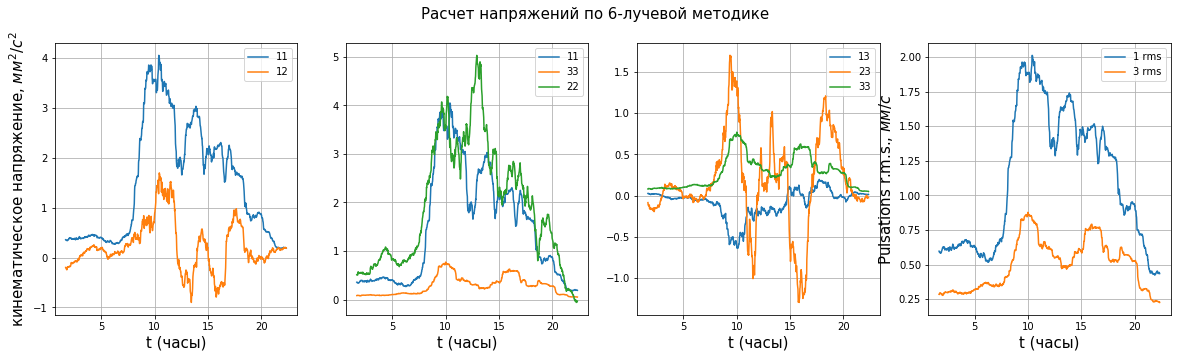

In [31]:

# Расчет по 6-лучевой методике
a0=3.14159*25/180
ta=np.tan(a0)
sin=np.sin(a0)
cos=np.cos(a0)
cta=1/ta
cta

# Рассчитываем интенсивности в ортогональной системе по упрощенной методике
QQ1=(q1av+q4av-2*q6av)/4
QQ12=-(q2av+q5av-q3av-q7av)/2/3**(1/2)
QQ3=(q1av+q4av+2*q6av)/4/cta**2
QQ2=((q2av+q5av+q3av+q7av)-Q1-Q3*4*cta**2)/3
QQ13=(q1av-q4av)/4/cta
QQ23=(q2av-q5av-q3av+q7av)/2/3**(1/2)

QQ1_rms=QQ1**(1/2)
QQ3_rms=QQ3**(1/2)
QQh_rms=(QQ1+QQ2)**(1/2)


c=sin**(-2)
d=sin**(-1)

fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].plot(th/60,c*QQ1*10**6, label='11')
ax[0].plot(th/60,c*QQ12*10**6,label='12')
ax[0].legend()
ax[0].grid()

ax[1].plot(th/60,c*QQ1*10**6,label=11)
ax[1].plot(th/60,c*QQ3*10**6,label=33)
ax[1].plot(th/60,c*QQ2*10**6,label=22)

ax[0].set_xlabel('t (часы)', fontsize=15)
ax[1].set_xlabel('t (часы)', fontsize=15)
ax[0].set_ylabel('кинематическое напряжение, ${мм}^2/c^2$', fontsize=15)
#x=np.arange(100,3850,1)
#ax[1].fill_between(x,-0.000001,0.000004, where = (Q2 < 0), facecolor='green', alpha=0.3,interpolate=True)


ax[1].legend()
ax[1].grid()

ax[2].plot(th/60,c*QQ13*10**6,label=13)
ax[2].plot(th/60,c*QQ23*10**6,label=23)
ax[2].plot(th/60,c*QQ3*10**6,label=33)
ax[2].legend()
ax[2].grid()
ax[2].set_xlabel('t (часы)', fontsize=15)

ax[3].plot(th/60,d*QQ1_rms*10**3, label='1 rms')
ax[3].plot(th/60,d*QQ3_rms*10**3, label='3 rms')
ax[3].legend()
ax[3].grid()
ax[3].set_xlabel('t (часы)', fontsize=15)
ax[3].set_ylabel('Pulsations r.m.s., ${мм}/c$', fontsize=15)

plt.suptitle('Расчет напряжений по 6-лучевой методике', fontsize=15)
plt.show() 


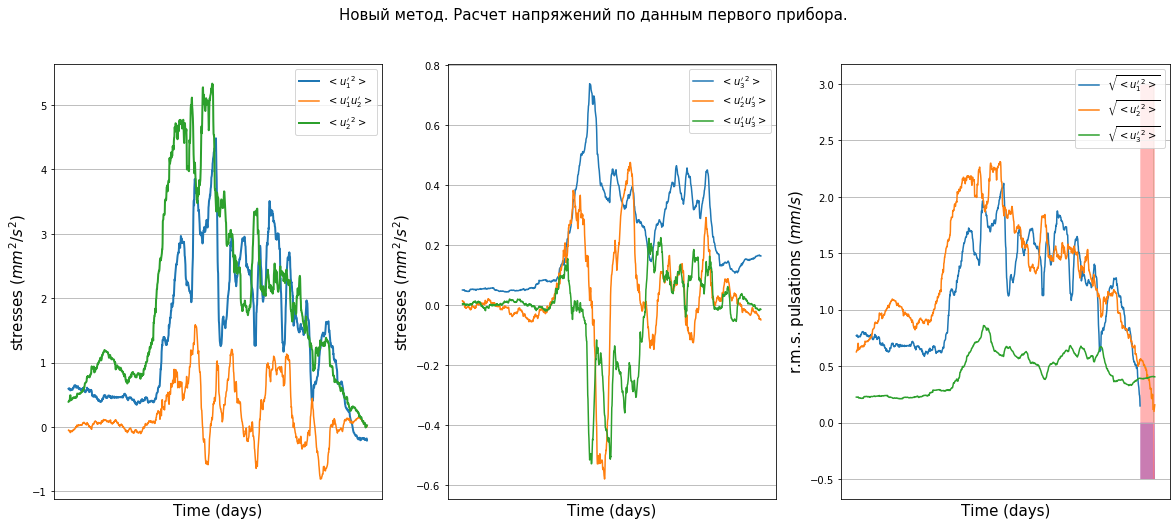

In [32]:
#t2 = np.arange(400, 3700, 1)
fig, ax = plt.subplots(1,3, figsize=(20,8))



###################################################################################
# Код Бородина для сеток и осей
days = ["28.03", "29.03", "30.03"]
#major_ticks = np.arange(980 - 720, 5000, 1440)
major_ticks = np.arange(ti, tf, 1440)


ax[0].grid(which='minor', alpha=0.2)
ax[0].grid(which='major', alpha=1)
ax[0].set_xticks(major_ticks)
ax[0].tick_params(axis="x", direction="out", length=8)
ax[0].set_xticklabels(days, fontdict={'verticalalignment': 'bottom'})
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
def tick(x, pos):
    if x % 1440 == 1100:
        return days[int(x)//1440]
    else:
        return ""

########################################################################################
    
ax[0].xaxis.set_major_formatter(NullFormatter())
ax[0].xaxis.set_minor_formatter(FuncFormatter(tick))
ax[0].set_xlabel('Time (days)',fontsize=15)
ax[0].set_ylabel('stresses ($mm^2/s^2$)',fontsize=15)

ax[0].plot(10**6*Q1/sin0/sin0, label='$<{u^\prime_1}^2>$',linewidth=2)
ax[0].plot(10**6*Q12/sin0/sin0,label='$<{u^\prime_1}{u^\prime_2}>$')
ax[0].plot(10**6*Q2/sin0/sin0,label='$<{u^\prime_2}^2>$',linewidth=2)
#a[0].plot(b11,label='b11')
#ax[0].plot(b22,label='b22')
#ax[0].plot(b33,label='b33')
ax[0].legend()
#ax[0].grid()

x=np.arange(ti,tf,1)

# Интервалы, на которых происходит нарушение условий реализуемости при расчетах по шести лучам
#ax[0].fill_between(x,0,8, where = (QQ2 < 0), facecolor='green', alpha=0.3,interpolate=True)
#ax[0].fill_between(x,-1,0, where = (QQ1*QQ2 < QQ12**2), facecolor='blue', alpha=0.3,interpolate=True)
#ax[0].fill_between(x,-1,0, where = (QQ3*QQ1 < QQ13**2), facecolor='red', alpha=0.3,interpolate=True)

#ax[0].fill_between(x,-1,0, where = (QQ2*QQ3 < QQ23**2), facecolor='red', alpha=0.3,interpolate=True)
#ax[0].fill_between(x,0,8, where = (QQ1 < 0), facecolor='red', alpha=0.3,interpolate=True)
#ax[0].fill_between(x,0,8, where = (QQ3 < 0), facecolor='red', alpha=0.3,interpolate=True)


ax[1].plot(10**6*Q3/sin0/sin0, label='$<{u^\prime_3}^2>$')
ax[1].plot(10**6*Q23/sin0/sin0,label='$<{u^\prime_2}{u^\prime_3}>$')
ax[1].plot(10**6*Q13/sin0/sin0,label='$<{u^\prime_1}{u^\prime_3}>$')
ax[1].legend()
#ax[1].grid()

ax[1].grid(which='minor', alpha=0.2)
ax[1].grid(which='major', alpha=1)
ax[1].set_xticks(major_ticks)
ax[1].tick_params(axis="x", direction="out", length=8)
ax[1].set_xticklabels(days, fontdict={'verticalalignment': 'bottom'})
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
def tick(x, pos):
    if x % 1440 == 1100:
        return days[int(x)//1440]
    else:
        return ""

########################################################################################
    
ax[1].xaxis.set_major_formatter(NullFormatter())
ax[1].xaxis.set_minor_formatter(FuncFormatter(tick))
ax[1].set_xlabel('Time (days)',fontsize=15)
ax[1].set_ylabel('stresses ($mm^2/s^2$)',fontsize=15)

ax[2].plot((10**6*Q1/sin0/sin0)**(1/2), label='$\sqrt{<{u^\prime_1}^2>}$')
ax[2].plot((10**6*Q2/sin0/sin0)**(1/2),label='$\sqrt{<{u^\prime_2}^2>}$')
ax[2].plot((10**6*Q3/sin0/sin0)**(1/2),label='$\sqrt{<{u^\prime_3}^2>}$')
ax[2].legend()
#ax[2].grid()


ax[2].grid(which='minor', alpha=0.2)
ax[2].grid(which='major', alpha=1)
ax[2].set_xticks(major_ticks)
ax[2].tick_params(axis="x", direction="out", length=8)
ax[2].set_xticklabels(days, fontdict={'verticalalignment': 'bottom'})
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))
def tick(x, pos):
    if x % 1440 == 1100:
        return days[int(x)//1440]
    else:
        return ""

########################################################################################
    
ax[2].xaxis.set_major_formatter(NullFormatter())
ax[2].xaxis.set_minor_formatter(FuncFormatter(tick))
ax[2].set_xlabel('Time (days)',fontsize=15)
ax[2].set_ylabel('r.m.s. pulsations ($mm/s$)',fontsize=15)

# Интервалы, на которых происходит нарушение условий реализуемости при расчетах по новому методу (с кросс-корреляциями)

x=np.arange(ti,tf,1)

plt.fill_between(x,0,3, where = (c*Q2 < 0), facecolor='green', alpha=0.3,interpolate=True)
plt.fill_between(x,-0.5,0, where = (Q1*Q2 < Q12**2), facecolor='blue', alpha=0.3,interpolate=True)
plt.fill_between(x,-0.5,0, where = (Q3*Q1 < Q13**2), facecolor='red', alpha=0.3,interpolate=True)

plt.fill_between(x,-0.5,0, where = (Q2*Q3 < Q23**2), facecolor='red', alpha=0.3,interpolate=True)
plt.fill_between(x,0,3, where = (Q1 < 0), facecolor='red', alpha=0.3,interpolate=True)
plt.fill_between(x,0,3, where = (Q3 < 0), facecolor='red', alpha=0.3,interpolate=True)

plt.suptitle('Новый метод. Расчет напряжений по данным первого прибора.',fontsize=15)
plt.show()

In [33]:
Q=Q1+Q2+Q3

x1=np.mgrid[-1:8:100j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)



a11=(Q1/Q)-1/3
a22=(Q2/Q)-1/3
a33=(Q3/Q)-1/3
a12=Q12/Q
a13=Q13/Q
a23=Q23/Q

b2_11=a11**2+a12**2+a13**2
b2_12=a11*a12+a12*a22+a13*a23
b2_13=a11*a13+a12*a23+a13*a33
b2_22=a12**2+a22**2+a23**2
b2_23=a12*a13+a22*a23+a33*a23
b2_33=a13**2+a23**2+a33**2
II=(b2_11+b2_22+b2_33)/2
III=(a11*b2_11+a22*b2_22+a33*b2_33+2*a12*b2_12+2*a13*b2_13+2*a23*b2_13)/3


Lu=pd.DataFrame(II)
Lu['III']=III
Lu['plane']=II-1/9-3*III
Lu['ax']=II-3*((abs(III))/2)**(2/3)



Lu.rename(columns={0:'II'}, inplace=True)
#Lu2=Lu.drop(Lu[(Lu.plane>0)].index)
Lu3=Lu.drop(Lu[(Lu.II > 0.30)].index) # &(Lu.plane < 0)].index)
Lu2=Lu3.drop(Lu3[(Lu3.plane>0)].index)
Lu1=Lu2.drop(Lu2[(Lu2.III < -0.02)].index)





In [34]:
# То же - для второго прибора (префикс s)

time=np.arange(9090,13499,1)
th=(time-9090)/60

sQ=sQ1+sQ2+sQ3

x1=np.mgrid[-1:8:100j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)



sa11=(sQ1/sQ)-1/3
sa22=(sQ2/sQ)-1/3
sa33=(sQ3/sQ)-1/3
sa12=sQ12/sQ
sa13=sQ13/sQ
sa23=sQ23/sQ

sb2_11=sa11**2+sa12**2+sa13**2
sb2_12=sa11*sa12+sa12*sa22+sa13*sa23
sb2_13=sa11*sa13+sa12*sa23+sa13*sa33
sb2_22=sa12**2+sa22**2+sa23**2
sb2_23=sa12*sa13+sa22*sa23+sa33*sa23
sb2_33=sa13**2+sa23**2+sa33**2
sII=(sb2_11+sb2_22+sb2_33)/2
sIII=(sa11*sb2_11+sa22*sb2_22+sa33*sb2_33+2*sa12*sb2_12+2*sa13*sb2_13+2*sa23*sb2_13)/3

#sII[10000]

sLu=pd.DataFrame(sII)
sLu['sIII']=sIII
sLu['plane']=sII-1/9-3*sIII
sLu['ax']=sII-3*((abs(sIII))/2)**(2/3)

sLu.rename(columns={0:'sII'}, inplace=True)


sLu3=sLu.drop(sLu[(sLu.sII > 0.30)].index) # &(Lu.plane < 0)].index)
sLu2=sLu3.drop(sLu3[(sLu3.plane>0)].index)
sLu1=sLu2.drop(sLu2[(sLu2.sIII < -0.02)].index)

#te=sLu1.loc[10000:10010]
#te

sLu1

l=len(sIII)
l


1440

In [36]:
No0=550 #9800 #+1440#9200 # 21:00, 14 May OK____________
No1=No0+1180 #13040 #10700+1440 #10000 #  
#Nom=9090 # Это полночь, с 02 на 03 апреля; старт приборов был в 16:30 27 марта 2020.
Nom=450 # Полночь, на 28 марта №9800 # Это полдень, 03 апреля; старт приборов был в 16:30 27 марта 2020.


No=No0 #1000

l1=pd.Series()#[0])
l2=pd.Series()#[0])
l3=pd.Series()#[0])

lam1=pd.Series()#[0])
lam2=pd.Series()#[0])
lam3=pd.Series()#[0])

III=pd.Series()#[0])
II=pd.Series()#[0])

# То же - для дополнительного (d) прибора

l1d=pd.Series()#[0])
l2d=pd.Series()#[0])
l3d=pd.Series()#[0])

lam1d=pd.Series()#[0])
lam2d=pd.Series()#[0])
lam3d=pd.Series()#[0])

IIId=pd.Series()#[0])
IId=pd.Series()#[0])

while No < No1:
    Re=np.array([[Q1[No],Q12[No],Q13[No]],[Q12[No],Q2[No],Q23[No]],[Q13[No],Q23[No],Q3[No]]])
    wRe, vRe=LA.eigh(Re) # wRe - собственные значения, vRe - (единичные) собственные векторы
    maj=wRe[0] # по факту это - минимальное собственное значение
    mini=wRe[1] # среднее
    ZZ=wRe[2] #
    
    Red=np.array([[sQ1[No],sQ12[No],sQ13[No]],[sQ12[No],sQ2[No],sQ23[No]],[sQ13[No],sQ23[No],sQ3[No]]])
    wRed, vRed=LA.eigh(Red) # wRe - собственные значения, vRe - (единичные) собственные векторы
    majd=wRed[0] # по факту это - минимальное собственное значение
    minid=wRed[1] # среднее
    ZZd=wRed[2] #
    
    l1add=pd.Series(ZZ*10**6,index=[(No-No0+1)])
    l2add=pd.Series(mini*10**6,index=[(No-No0+1)])
    l3add=pd.Series(maj*10**6,index=[(No-No0+1)])
    
    l1addd=pd.Series(ZZd*10**6,index=[(No-No0+1)])
    l2addd=pd.Series(minid*10**6,index=[(No-No0+1)])
    l3addd=pd.Series(majd*10**6,index=[(No-No0+1)])
    
    l1=l1.append(l1add)
    l2=l2.append(l2add)
    l3=l3.append(l3add)
    
    l1d=l1d.append(l1addd)
    l2d=l2d.append(l2addd)
    l3d=l3d.append(l3addd)
   
    
    lam1add=pd.Series(ZZ/(Q1[No]+Q2[No]+Q3[No])-1/3,index=[(No-No0+1)]) # Рассчитываем собственные числа тензора анизотропии
    lam2add=pd.Series(mini/(Q1[No]+Q2[No]+Q3[No])-1/3,index=[(No-No0+1)])
    lam3add=pd.Series(maj/(Q1[No]+Q2[No]+Q3[No])-1/3,index=[(No-No0+1)])
    
    lam1addd=pd.Series(ZZd/(sQ1[No]+sQ2[No]+sQ3[No])-1/3,index=[(No-No0+1)]) # Рассчитываем собственные числа тензора анизотропии
    lam2addd=pd.Series(minid/(sQ1[No]+sQ2[No]+sQ3[No])-1/3,index=[(No-No0+1)])
    lam3addd=pd.Series(majd/(sQ1[No]+sQ2[No]+sQ3[No])-1/3,index=[(No-No0+1)])
    
    lam1=lam1.append(lam1add)
    lam2=lam2.append(lam2add)
    lam3=lam3.append(lam3add)
    
    lam1d=lam1d.append(lam1addd)
    lam2d=lam2d.append(lam2addd)
    lam3d=lam3d.append(lam3addd)
    
    #Второй и третий инварианты тензора анизотропии:
    IIadd=pd.Series(lam1add**2+lam1add*lam2+lam2add**2,index=[(No-No0+1)])
    IIIadd=pd.Series(-lam1add*lam2add*(lam1add+lam2add),index=[(No-No0+1)])
    
    IIaddd=pd.Series(lam1addd**2+lam1addd*lam2+lam2addd**2,index=[(No-No0+1)])
    IIIaddd=pd.Series(-lam1addd*lam2addd*(lam1addd+lam2addd),index=[(No-No0+1)])
    
    III=III.append(IIIadd)
    II=II.append(IIadd)
    
    IIId=IIId.append(IIIaddd)
    IId=IId.append(IIaddd)
    
    No=No+1


timm=np.arange(No0-Nom,No1-Nom,1)



C:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype expl

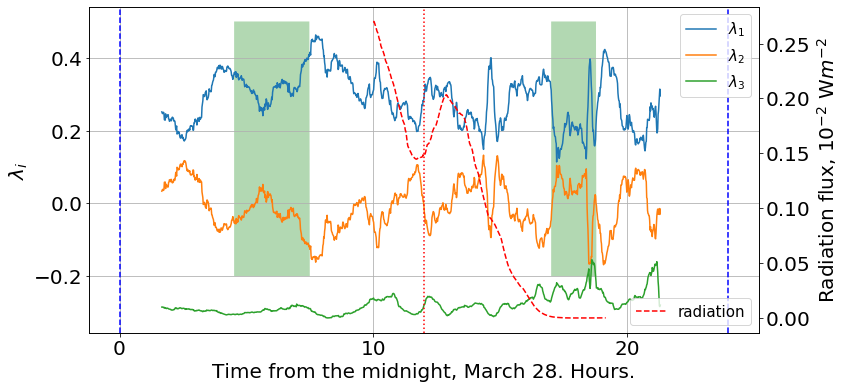

In [37]:
ta=100
rad=pd.read_csv(r"C:\Users\User\My Nortek\radiation1.csv")
ra=rad.iloc[(0):((550+1180)-1080)]
ra.index=np.arange(550,(550+650),1)#len(ra))
ra.columns=['0','1','2']
r=ra['2']
rr=r.rolling(ta,center=True).mean()
rr

timmr=np.arange(550,1200,1)


plt.figure(figsize=(12,6))
ax_01 = plt.axes()
line_01, = ax_01.plot(timm/60,lam1,label='$\lambda_1$')
line_03, = ax_01.plot(timm/60,lam2,label='$\lambda_2$')
line_04, = ax_01.plot(timm/60,lam3,label='$\lambda_3$')


plt.legend(fontsize=15)

#plt.figure(figsize=(12,6))
#plt.plot(timm/60,lam1,label='$\lambda_1$')        
#plt.plot(timm/60,lam2,label='$\lambda_2$')  
#plt.plot(timm/60,lam3,label='mini') 

ax_01.set_xlabel('Time from the midnight, March 28. Hours.', fontsize=20)
ax_01.set_ylabel('$\lambda_i$', fontsize=20)
plt.legend(fontsize=15)
plt.grid()

ax_01.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_01.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
#ax[0,0].yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax_01.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20)    #  Размер подписи


xdcoords=np.arange(0,25,24)
for xc in xdcoords:
    ax_01.axvline(x=xc,color='b', linestyle='--')
    
xncoords=np.arange(12,25,24)
for xc in xncoords:
    ax_01.axvline(x=xc,color='r', linestyle='dotted')

ax_01.fill_between(timm/60,-0.2,0.5, where = (7.5*60>timm) & (timm>4.5*60), facecolor='green', alpha=0.3,interpolate=True)
ax_01.fill_between(timm/60,-0.2,0.5, where = (18.8*60>timm) & (timm>17*60), facecolor='green', alpha=0.3,interpolate=True)

#plt.title('Anisotropy tensor eigenvalues dynamics. I device')
#plt.xlabel('Time from the midnight, March 28. Hours.', fontsize=20)

ax_02 = ax_01.twinx()
ax_02.set_ylabel('Radiation flux, $10^{-2}$ W$m^{-2}$', fontsize=20)
line_02 = ax_02.plot(timmr/60, rr/200, label='radiation', linestyle='dashed',color='red')
plt.legend(fontsize=15, loc='lower right')
plt.grid()

ax_02.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_02.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

ax_02.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20)    #  Размер подписи
#plt.ylabel('$\lambda_i$', fontsize=20)

plt.legend(fontsize=15, loc='lower right')
plt.grid()
#plt.show()

plt.savefig("Fig 2b.png",dpi=600)


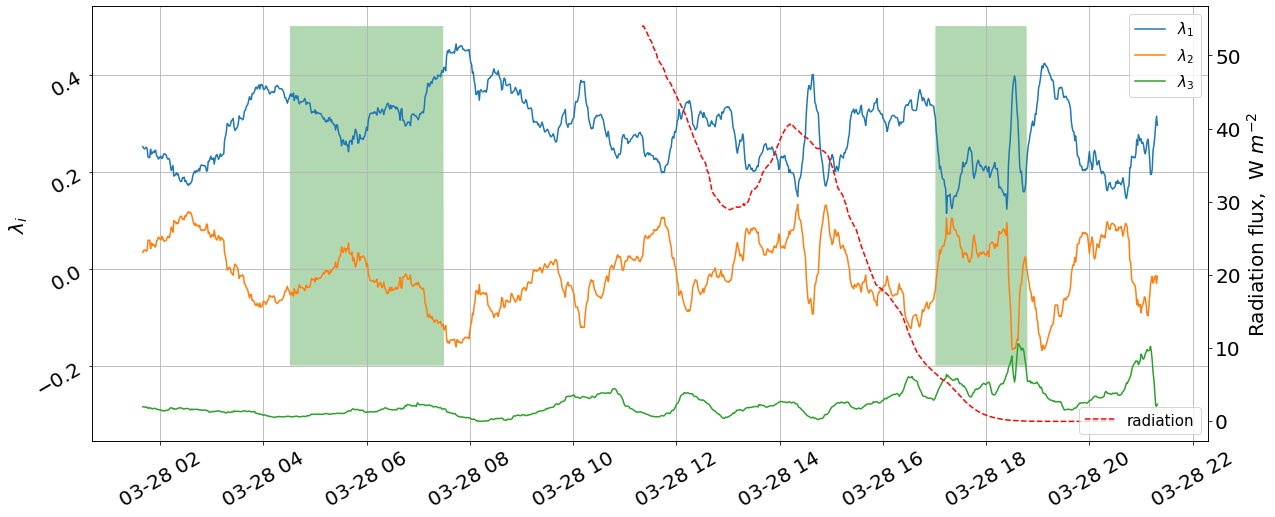

In [39]:
import datetime  #Пакет для работы с датами
from matplotlib import dates as mpl_dates  

start = datetime.datetime(2020, 3, 27, 16,30)
t11=550
t22=1730

#time = [start + datetime.timedelta(minutes=i-100) for i in range(t11,t22)]

plt.figure(figsize=(20, 8))


ax_01 = plt.axes()

X = [start + datetime.timedelta(minutes=i) for i in range(t11,t22)]
X1 = [start + datetime.timedelta(minutes=i) for i in range(t22-650,t22)]

line_01, = ax_01.plot(X,lam1,label='$\lambda_1$')
line_03, = ax_01.plot(X,lam2,label='$\lambda_2$')
line_04, = ax_01.plot(X,lam3,label='$\lambda_3$')

#ax_01.set_xlabel('Time from noon, April 03. Hours.', fontsize=20)
ax_01.set_ylabel('$\lambda_i$', fontsize=20)
plt.legend(fontsize=15)
plt.grid()

#ax_01.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_01.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
#ax[0,0].yaxis.set_major_locator(ticker.MultipleLocator(0.5))




#ax_01.gcf().autofmt_xdate() #для форматирования даты

ax_01.xaxis.set_major_formatter(mpl_dates.DateFormatter('%d/%m/20%y')) #Формат даты
#ax_01.xticks(rotation = 30,ha='right') 






ax_01.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20, rotation = 30)    #  Размер подписи


ax_02 = ax_01.twinx()
ax_02.set_ylabel('Radiation flux,  W $m^{-2}$', fontsize=20)
#line_02 = ax_02.plot(X, rr/200, label='radiation', linestyle='dashed',color='red')
line_02 = ax_02.plot(X1, rr, label='radiation', linestyle='dashed',color='red')
plt.legend(fontsize=15, loc='lower right')
#plt.grid()

#ax_02.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_02.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax_02.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20)    #  Размер подписи

#plt.fill_between(timm/60,-0.2,0.5, where = (34*60>timm) & (timm>30*60), facecolor='green', alpha=0.3,interpolate=True)
ax_01.fill_between(X,-0.2,0.5, where = (7.5*60>timm) & (timm>4.5*60), facecolor='green', alpha=0.3,interpolate=True)
ax_01.fill_between(X,-0.2,0.5, where = (18.8*60>timm) & (timm>17*60), facecolor='green', alpha=0.3,interpolate=True)

#plt.plot()

plt.savefig("Fig 3a.png",dpi=600)

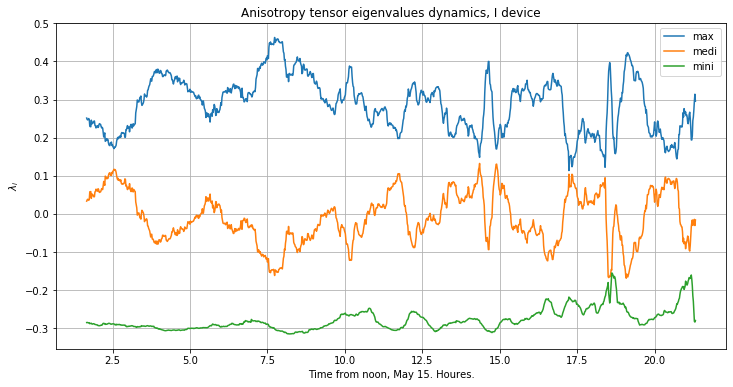

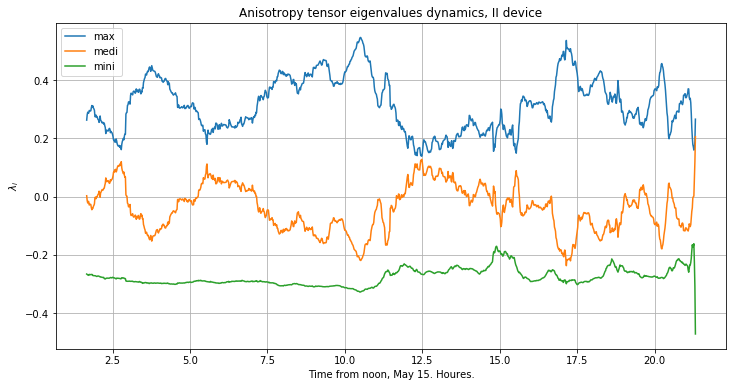

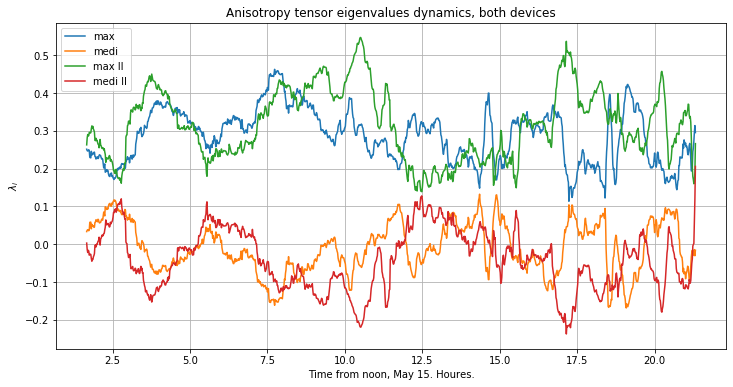

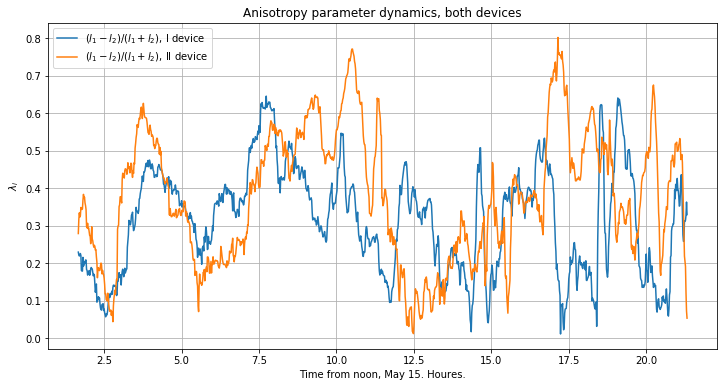

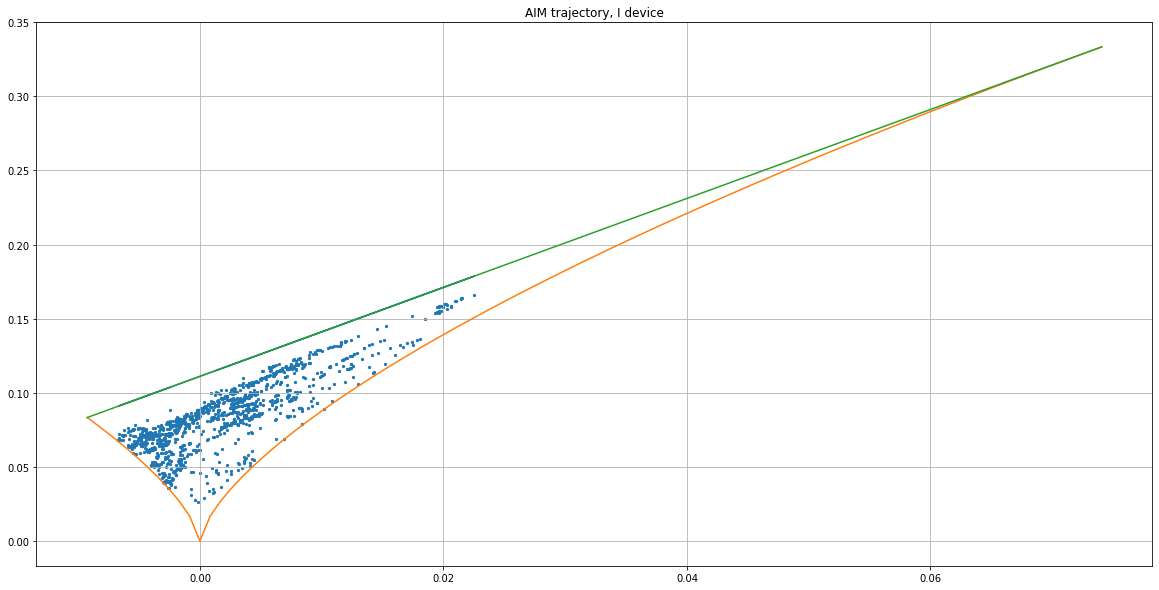

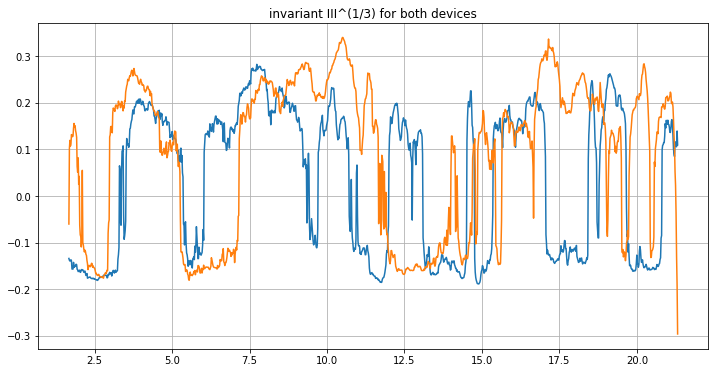

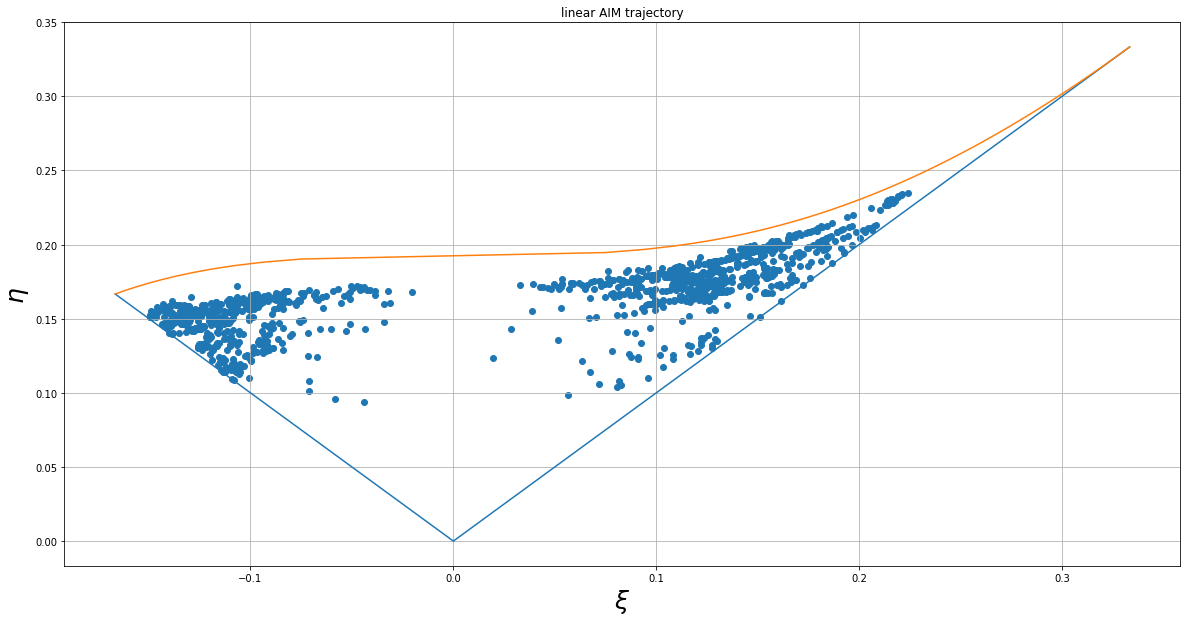

In [40]:
timm=np.arange(No0-Nom,No1-Nom,1)

plt.figure(figsize=(12,6))
plt.plot(timm/60,lam1,label='max')        
plt.plot(timm/60,lam2,label='medi')  
plt.plot(timm/60,lam3,label='mini') 
plt.title('Anisotropy tensor eigenvalues dynamics, I device')
plt.xlabel('Time from noon, May 15. Houres.')
plt.ylabel('$\lambda_i$')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(timm/60,lam1d,label='max')        
plt.plot(timm/60,lam2d,label='medi')  
plt.plot(timm/60,lam3d,label='mini') 
plt.title('Anisotropy tensor eigenvalues dynamics, II device')
plt.xlabel('Time from noon, May 15. Houres.')
plt.ylabel('$\lambda_i$')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(timm/60,lam1,label='max')        
plt.plot(timm/60,lam2,label='medi')  
plt.plot(timm/60,lam1d,label='max II') #,linewidth=5,linestyle='dashed') 
plt.plot(timm/60,lam2d,label='medi II') #,linewidth=5,linestyle='dashed') 
plt.title('Anisotropy tensor eigenvalues dynamics, both devices')
plt.xlabel('Time from noon, May 15. Houres.')
plt.ylabel('$\lambda_i$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(timm/60,(l1-l2)/(l1+l2),label='$(l_1-l_2)/(l_1+l_2)$, I device')        
plt.plot(timm/60,(l1d-l2d)/(l1d+l2d),label='$(l_1-l_2)/(l_1+l_2)$, II device')

plt.title('Anisotropy parameter dynamics, both devices')
plt.xlabel('Time from noon, May 15. Houres.')
plt.ylabel('$\lambda_i$')
plt.legend()
plt.grid()
plt.show()

IIIa=III.drop(III[II>3*(1/27+III)].index)
IIa=II.drop(II[II>3*(1/27+III)].index)
#if(II<3*(1/27+III)):


plt.figure(figsize=(20,10))
plt.scatter(IIIa,IIa,s=5) 
plt.title('AIM trajectory, I device')
plt.plot(IIIa,1/9+3*IIIa)

x1=np.mgrid[-1:8:100j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)
plt.plot(x,ya)
plt.plot(x,yp)

#plt.plot(IIIa,3*(IIIa/2)**(2/3))
#plt.plot(IIIa,3*(-IIIa/2)**(2/3))
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(timm/60,cbrt(III),label='III')
plt.title('invariant III^(1/3) for both devices')
plt.plot(timm/60,cbrt(IIId),label='III')   


#plt.vlines(0,0,0.05,color='red',linestyles='dashed', linewidth=5)
#plt.vlines(0,0,0.05,color='red',linestyles='dashed', linewidth=5)
#plt.vlines(12,0,0.05,color='blue',linestyles='dashed', linewidth=5)
#plt.vlines(12,0,0.05,color='blue',linestyles='dashed', linewidth=5)

plt.grid()
plt.show()


plt.figure(figsize=(20,10))
plt.scatter(cbrt(III/2),(II/3)**(1/2))

x2=cbrt(x/2)
plt.plot(x2,abs(x2))
plt.plot(x2,(1/27+2*x2**3)**(1/2))
plt.ylabel(r'$\eta$',fontsize=25)
plt.xlabel(r'$\xi$',fontsize=25)
plt.title('linear AIM trajectory')
plt.grid()
plt.show()

VzI3l=VzI3.loc[No0:No1-1]



In [23]:
#9800 13040
ta=100
rad=pd.read_csv(r"C:\Users\User\My Nortek\radiation1.csv")
ra=rad.iloc[(9800-1080):(13040-1080)]
ra.index=np.arange(9800,13040,1)#len(ra))
ra.columns=['0','1','2']
r=ra['2']
rr=r.rolling(ta,center=True).mean()
rr

9800    NaN
9801    NaN
9802    NaN
9803    NaN
9804    NaN
         ..
13035   NaN
13036   NaN
13037   NaN
13038   NaN
13039   NaN
Name: 2, Length: 3240, dtype: float64